# Data Science Test 2 - Fleury
## Bruno Caldas
## 1. Importação das bibliotecas necessárias

In [1]:
# Bibliotecas básicas de manipulação de dados
import pandas as pd
import numpy as np

# Biblioteca de machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pyod.models.knn import KNN
from sklearn.linear_model import LassoCV

# Biblioteca de Visualização
import matplotlib.pyplot as plt

# Limpar warning de dados ruins
import warnings; warnings.filterwarnings('ignore')
# Mostrar todas colunas
pd.set_option('display.max_columns', None)

## 2. Leitura dos dados e análise de possíveis limpezas da base

In [2]:
data = pd.read_csv('test2_original/data/dados.csv', sep=';')
data

,Dia semana agendamento,Ano agendamento,Mes agendamento,Hora agendamento,Dia mes agendamento,Dia semana atendimento,Ano atendimento,Mes atendimento,Hora atendimento,Dia mes atendimento,Secao,Medico preferencial,Renda Provavel,MicroArea,Diretoria,Cod convenio,Codigo exame,Idade,Tempo medio de agendamento,Unidade,Bairro,Feminino,No Show,Unnamed: 23,Legenda
0,6,2019,8,8,18,3,2019,8,15,15,110,0,1028823,377,7,115,465530,39,2,VILLA LOBOS,4218,1,0,NaN,Show = 0
1,2,2019,11,7,6,0,2019,11,13,4,110,0,1028823,377,7,115,465530,39,1,VILLA LOBOS,4218,1,1,NaN,No Show = 1
2,5,2019,8,8,31,3,2019,8,15,15,36,0,1028823,377,7,115,465530,39,15,ITAIM,4218,1,0,NaN,NaN
3,4,2019,9,11,27,4,2019,9,8,27,110,1,489594,767,7,115,465530,49,0,HIGIENÓPOLIS,2169,1,0,NaN,NaN
4,4,2019,10,11,11,1,2019,10,17,1,110,0,31829,568,7,115,7244510,33,9,ALPHAVILLE,9638,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299611,3,2019,10,10,31,0,2019,9,17,30,114,0,466019,541,7,27155,6379880,32,30,R LÍBANO I,8014,0,0,NaN,NaN
299612,2,2019,10,10,16,0,2019,9,16,30,98,0,596056,194,7,330,483860,13,15,ANÁLIA FRANCO II,1519,1,1,NaN,NaN
299613,6,2019,11,9,3,5,2019,10,8,26,98,0,596056,194,7,330,483860,13,8,PARAÍSO,1519,1,0,NaN,NaN
299614,6,2019,11,13,3,6,2019,11,10,3,98,0,596056,194,7,330,483860,13,0,PARAÍSO,1519,1,0,NaN,NaN


Como pode ser visto na tabela anterior, há duas colunas no final da tabela que não possuem informação. Vamos analisar o conteúdo delas e a possibilidade de sua eliminação

In [3]:
nullvalues = data[data.columns[-2:]].isnull().sum(axis = 0)
length = len(data[data.columns[-2:]])
print('O valor de nulos da penultima coluna é {}'.format(nullvalues[0]))
print('O valor de nulos da última coluna é {}'.format(nullvalues[1]))
print('O tamanho total das linhas é {}'.format(length))

O valor de nulos da penultima coluna é 299616
O valor de nulos da última coluna é 299614
O tamanho total das linhas é 299616


Pela análise anterior, pode-se concluir que pode-se eliminar as duas últimas colunas:

In [4]:
data = data[data.columns[:-2]]

Outra possibilidade vista na base que deve se verificar é a coluna relacionada a ano que não parece se alterar.

In [5]:
data.groupby('Ano agendamento').count()

,Dia semana agendamento,Mes agendamento,Hora agendamento,Dia mes agendamento,Dia semana atendimento,Ano atendimento,Mes atendimento,Hora atendimento,Dia mes atendimento,Secao,Medico preferencial,Renda Provavel,MicroArea,Diretoria,Cod convenio,Codigo exame,Idade,Tempo medio de agendamento,Unidade,Bairro,Feminino,No Show
Ano agendamento,,,,,,,,,,,,,,,,,,,,,,
2019,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616


In [6]:
data.groupby('Ano atendimento').count()

,Dia semana agendamento,Ano agendamento,Mes agendamento,Hora agendamento,Dia mes agendamento,Dia semana atendimento,Mes atendimento,Hora atendimento,Dia mes atendimento,Secao,Medico preferencial,Renda Provavel,MicroArea,Diretoria,Cod convenio,Codigo exame,Idade,Tempo medio de agendamento,Unidade,Bairro,Feminino,No Show
Ano atendimento,,,,,,,,,,,,,,,,,,,,,,
2019,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616,299616


Desta forma podemos eliminar a coluna "ano" tanto no agendamento quanto para o atendimento, pois não acrescentam em nada a análise

In [7]:
data.drop('Ano agendamento', 1, inplace=True)
data.drop('Ano atendimento', 1, inplace=True)

Neste momento, é criado um dicionário para tratar Unidades como número e não mais como texto para se trabalhar nos algoritmos seguintes.

In [8]:
unidades = {}
temp_id = 0
for unit in data.Unidade.unique():
    unidades[unit] = temp_id
    temp_id += 1
data.replace({"Unidade": unidades}, inplace=True)

A fim de eliminar "outliers" que podem trazer prejuízos ao modelo preditivo, percebe-se que há registros não compatíveis no atributo idade.

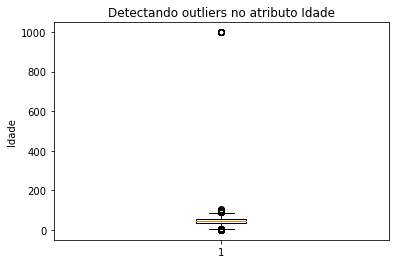

In [9]:
plt.boxplot(data['Idade'], showfliers=True)
plt.title('Detectando outliers no atributo Idade')
plt.ylabel('Idade')
plt.show()

Visualmente no gráfico anterior, pode-se perceber idades próximas a mil o que é irreal. Desta forma, será trabalhado os dados com idade superior a 200.

In [10]:
outliers_idade = data[(data.Idade>200)]

In [11]:
print("Existem {} entradas com idade incompatíveis".format(outliers_idade.shape[0]))

Existem 37 entradas com idade incompatíveis


Como são poucos registros com problemas de idade e para não perder os dados acima somente pelo erro de idade, vamos substituir estes valores pela média.

In [12]:
avg_age = data[(data.Idade<200)].mean()['Idade']
data.loc[data['Idade'] > 200, 'Idade'] = avg_age

## 3. Separação das bases de treino e teste
Segue a separação da base do que se quer prever ("no show") do restante dos atributos, além de separar 20% da base para verificação do algoritmo de predição (teste).

In [13]:
x_columns = data.columns.to_list()
x_columns.remove('No Show')

data_y = data['No Show']

x_columns = data.columns.to_list()
x_columns.remove('No Show')
data_x = data[x_columns]

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=0.2, random_state=1)

x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

## 4. Limpeza de "outliers" gerais
Por último, é feita uma última limpeza dos dados analisando sua distância euclidiana do restante da base.
Isso será feito apenas na base de treino para não enviesar o desempenho do algoritmo

In [14]:
detector_outliers = KNN()
detector_outliers.fit(x_train)

x_train['outliers'] = pd.DataFrame(detector_outliers.labels_)

y_train = y_train.to_frame()[x_train['outliers']==0]['No Show']
x_train = x_train[x_train['outliers']==0].drop('outliers', 1)

print("A quantidade de outliers detectada e retirada foi de: {}"
      .format(sum(detector_outliers.labels_)))

A quantidade de outliers detectada e retirada foi de: 23969


## 5. Modelo de Regressão Logística
Como a idéia é prever valores binários, o primeiro algoritmo a ser testado é o de regressão logística.

In [15]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [16]:
predictions = logreg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("A precisão do modelo de regressão logística é {}".format(accuracy))

A precisão do modelo de regressão logística é 0.8821006608370603


## 6. Modelo KNN
Com a intenção de melhorar a acurácia do modelo anterior, o algoritmo KNN é analisado, entretanto para isso é feita primeira a busca de um ótimo valor de "k" vizinhos mais próximos.
Para não se gastar muito custo computacional neste estudo, 20 valores de k (1 até 20) são computados e o gráfico com sua acurácia é plotado.

In [17]:
best_k = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    predictions = knn.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    best_k.append(round(accuracy,4))

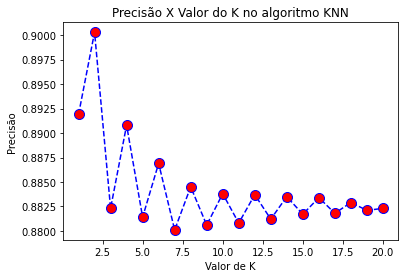

In [18]:
plt.plot(range(1,21),best_k,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Precisão X Valor do K no algoritmo KNN')
plt.xlabel('Valor de K')
plt.ylabel('Precisão')
plt.show()

Pelo gráfico anterior, pode-se notar a tendência de queda ao longo dos valores explorados, alem de uma estabilização para valores maiores do que 20.
Com isso, aconselha-se usar o melhor valor encontrado.

In [19]:
print("A precisão do modelo KNN ficou em {a} com k={b}".format(
    a=max(best_k),
    b=best_k.index(max(best_k))+1
    ))

A precisão do modelo KNN ficou em 0.9003 com k=2


## 7. Análise dos dados
Após a elaboração do modelo preditivo anterior, vamos analisar quais os principais fatores para haver "no show".

Para isso usaremos um terceiro algoritmo que possui um método embutido de seleção de atributos.

In [ ]:
reg = LassoCV()
reg.fit(x_train, y_train)
coef = pd.Series(reg.coef_, index = x_train.columns)

print("A seleção de atributos foi de {a}, eliminando as outras {b}".format(
    a=sum(coef != 0),b=sum(coef == 0)))

Vamos analisar como seria o desempenho deste algoritmo na base de teste

In [ ]:
y_p = reg.predict(x_test).astype(np.int)
accuracy = metrics.accuracy_score(y_test, predictions)
print("O desempenho deste algoritmo foi de {a}".format(a=accuracy))

O que mostra que o algoritmo selecionado ainda não é melhor do que o do KNN escolhido anteriormente.

Assim, vamos verificar se o algoritmo KNN ainda apresenta desempenho suficiente com apenas os 4 atributos selecionados.

In [ ]:
x_train_fselected = x_train[coef[coef!=0].index]
x_test_fselected = x_test[coef[coef!=0].index]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_fselected, y_train)

predictions = knn.predict(x_test_fselected)
accuracy = metrics.accuracy_score(y_test, predictions)
print("O desempenho do algoritmo do KNN com apenas os 4\
 atributos é de: {a}".format(a=accuracy))

O que ainda é um bom valor para modelos preditivos, ou seja estes 4 atributos conseguem prever razoavelmente bem a probabilidade de no show.

In [ ]:
important_att = coef[coef!=0].index.to_list()
print("A análise anterior mostra que os atributos mais\
 importantes são:\n{}".format(important_att))

Agora vamos analisar estatísticamente quais são as variáveis mais críticas destes atributos.

In [ ]:
def critical_variables(df, sigma_n=1):
    '''
    This function returns the variables with
    total appointments and no show issues
    above mean and sigma_n standard deviation
    '''
    # Calculating totals of appointments
    df_totals = df.groupby(df.columns[0]).size().to_frame()
    df_totals.reset_index(drop=False, inplace=True)
    df_totals.rename({0:'Consultas Totais'}, axis=1, inplace=True)
    
    # Calculating totals of no show events
    df_noshow = df[df['No Show']==1]
    df_noshow = df_noshow.groupby(df.columns[0]).size().to_frame()
    df_noshow.reset_index(drop=False, inplace=True)
    df_noshow.rename({0:'Consultas No Show'}, axis=1, inplace=True)

    df_output = pd.merge(df_totals, df_noshow, on=[df.columns[0]],
                         how='inner')
    
    mean_app = df_output['Consultas Totais'].mean()
    std_app = df_output['Consultas Totais'].std()
    mean_noshow = df_output['Consultas No Show'].mean()
    std_noshow = df_output['Consultas No Show'].std()
    
    df_output = df_output[
        df_output['Consultas Totais'] > mean_app + sigma_n*std_app
        ]
    df_output = df_output[
        df_output['Consultas No Show'] > mean_noshow + sigma_n*std_noshow
        ]
    return df_output

In [ ]:
neighborhood = data[['Bairro', 'No Show']]
exam_cod = data[['Codigo exame', 'No Show']]
insurance_cod = data[['Cod convenio', 'No Show']]
income = data[['Renda Provavel', 'No Show']]

Os bairros mais críticos a serem trabalhados e que estão a 6 desvios padrão da média são:

In [ ]:
critical_variables(neighborhood, sigma_n=6)

Já os exames mais críticos que devem ser analisados com mais cuidado, pois estão a 1 desvio padrão da média:

In [ ]:
critical_variables(exam_cod, sigma_n=1)

Os convênios médicos mais críticos que também estão a uma distância de um desvio padrão da média são:

In [ ]:
critical_variables(insurance_cod, sigma_n=1)

Por último, a renda salarial pode ser dividias em 1000 faixas salariais para melhorar a visualização

In [ ]:
amplitude = (
    income[['Renda Provavel']].max() -
    income[['Renda Provavel']].min()
    )/1000
ranges = np.arange(0, int(income[['Renda Provavel']].max()), int(amplitude))
income_ranges = income.groupby(pd.cut(income["Renda Provavel"], ranges)).agg(
    No_Show=('No Show', 'sum'),
    Totais=('No Show', 'count'),
    ).reset_index()

income_ranges['Provavel No Show'] = income_ranges['No_Show'] / \
                                    income_ranges['Totais']
income_ranges['Provavel No Show'] = income_ranges['Provavel No Show'].fillna(0)
income_ranges = income_ranges[income_ranges['Provavel No Show']<.4]

Como pode ser visto anteriormente, há uma provável tendência de no show quanto menor for a renda do paciente. 

In [ ]:
#income_ranges[['Renda Provavel']]
graph = income_ranges[['Provavel No Show', 'Renda Provavel']].plot(
    title='Renda Salarial X Quantidade de No Show',
    legend=None)
plt.xlabel('Faixa salarial')
plt.ylabel('Quantidade de no show')
axes = plt.gca()
axes.set_ylim([-0.1,.4])
plt.show()

Com o gráfico anterior, pode-se inferir que quanto menor a renda, maior tende a ser a chance de haver no show.

## 8. Conclusões finais

Um modelo preditivo utilizando algoritmo KNN foi desenvolvido com sucesso e possui acurácia de pouco mais de 90%, o que deve ser satisfatório para o propósito.

Este algoritmo pode ser implementado em um sistema backend ou um microserviço conectado com o sistema do laboratório através de uma API, pois desta forma assim que as consultas forem marcadas medidas podem ser tomadas para evitar o não comparecimento do paciente.

Quanto a essas medidas, os fatores principais que influenciam no "No Show" foram analisados, sendo eles bairro, tipo de exame, código de convênio e renda salarial provável.

Para todos eles foram levantados quais bairros, exames e convênios são mais críticos e devem ser trabalhados um a um.
Vale lembrar que os bairros mais críticos estão a 6 desvios padrão de distância da média, ou seja, há alguns bairros com maior chance de não comparecimento.
Além disso, percebeu-se que quanto menor a provável renda, maior a tendência do paciente não comparecer à consulta.